In [2]:
# Networks
import igraph as ig
import louvain
#import networkx as nx
# Computation
import numpy as np
np.random.seed(0)
import scipy
import random
random.seed(0)

# Data
import pandas as pd
import csv

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

import sys

import plotly
import plotly.plotly as py

In [41]:
def read_file(name):
    lista=[]
    f = open("./data/file_to_metro/"+name+".txt", "r")
    for i in f:
        tmp=i.replace('"','')
        tmp=tmp.rstrip()
        lista.append(tmp.split(','))
    return lista

def read_csv(name):
    lista=[]
    f = open("./data/csv/"+name+".csv", "r")
    for i in f:
        tmp=i.replace('"','')
        tmp=tmp.rstrip()
        lista.append(tmp.split(','))
    return lista

In [10]:
tram=read_csv("tram")
header_tram=tram[0]
del tram[0]
#print(tram)

#contiene la successione di fermate giuste
shape_route_t={}
#contiene le fermate senza ripetizioni
all_stop={}
#contiene le route associate ad ogni fermata
stop_route_t={}
for m in tram:
    shape_route_t[m[6]]=[]
    all_stop[m[2]]=[]
    stop_route_t[m[2]]=[]
    
for m in tram:
    shape_route_t[m[6]].append(m[2])
    all_stop[m[2]]=m
    if not(m[0] in stop_route_t[m[2]] ):
        stop_route_t[m[2]].append(m[0])

edges_t=[]
for i in shape_route_t.values():
    for j in range(len(i)-1):
        edges_t.append((i[j],i[j+1]))
            

edges_t=[]
for i in shape_route_t.values():
    for j in range(len(i)-1):
        edges_t.append((i[j],i[j+1]))


g_t= ig.Graph(directed=False)
g_t.add_vertices(len(all_stop.keys())-1)
g_t.add_vertex()
cont=0
for stop in all_stop.values():
    g_t.vs[cont]["label"]=stop[2]
    g_t.vs[cont]["name"]=stop[1]
    coord=str(stop[4])+', '+str(stop[5])
    g_t.vs[cont]["coord"]=coord
    #g_t.vs[cont]["stopLat"]=stop[4]
    #g_t.vs[cont]["stopLon"]=stop[5]
    tmp=''
    for j in stop_route_t[stop[2]]:
        tmp+=j+','
    tmp=tmp[0:-1]
    g_t.vs[cont]["routes"]=tmp
    cont+=1


In [11]:
#aggiunta di tutti gli archi
for pair in edges_t:
    t=g_t.vs.find(label=pair[0])
    s=g_t.vs.find(label=pair[1])
        
    g_t.add_edges([(t,s)])
   
    
n = g_t.vcount()
m = g_t.ecount()
print('{0} nodes, {1} edges'.format(n, m))

449 nodes, 479 edges


In [13]:
#controllo nodi con degree=0
degree=g_t.degree()
cont=0
for i in degree:
    if i ==0:
        cont+=1 
print(cont)


0


In [15]:
for i in range(449):
    tmp=g_t.vs[i].degree()
    if tmp==0:
        print(g_t.vs[i])

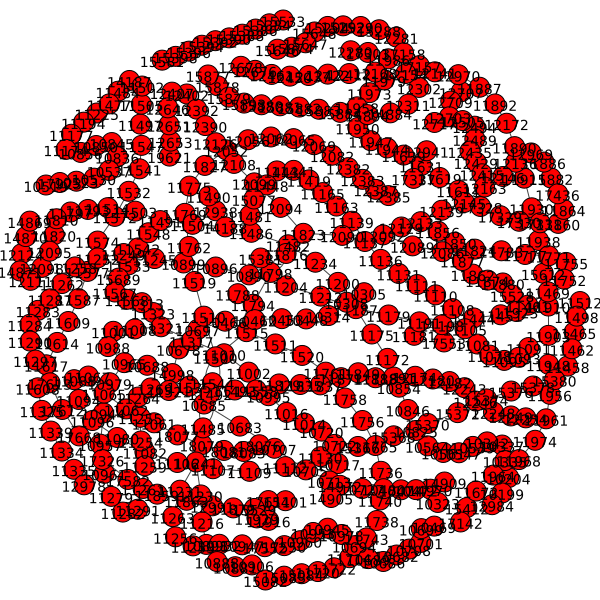

In [17]:
ig.plot(g_t)

In [19]:
g_t.save("./data/graph/tram.gml" ,format="gml")

In [25]:
bus=read_csv("bus")
header_bus=bus[0]
del bus[0]

#contiene le route associate ad ogni fermata
stop_route_b={}
#contiene la successione di fermate giuste
shape_route_b={}
#contiene le fermate senza ripetizioni
all_stop_b={}
for m in bus:
    shape_route_b[m[6]]=[]
    all_stop_b[m[2]]=[]
    stop_route_b[m[2]]=[]
    
for m in bus:
    shape_route_b[m[6]].append(m[2])
    all_stop_b[m[2]]=m
    if not(m[0] in stop_route_b[m[2]] ):
        stop_route_b[m[2]].append(m[0])

edges_b=[]
for i in shape_route_b.values():
    for j in range(len(i)-1):
        edges_b.append((i[j],i[j+1]))
            

#print(stop_route_b)
        
edges_b=[]
for i in shape_route_b.values():
    for j in range(len(i)-1):
        edges_b.append((i[j],i[j+1]))


g_b= ig.Graph(directed=False)
g_b.add_vertices(len(all_stop_b.keys())-1)
g_b.add_vertex()
cont=0
for stop in all_stop_b.values():
    g_b.vs[cont]["label"]=stop[2]
    g_b.vs[cont]["name"]=stop[1]
    coord=str(stop[4])+', '+str(stop[5])
    g_b.vs[cont]["coord"]=coord
    #g_b.vs[cont]["stopLat"]=stop[4]
    #g_b.vs[cont]["stopLon"]=stop[5]
    tmp=''
    for j in stop_route_b[stop[2]]:
        tmp+=j+','
    tmp=tmp[0:-1]
    g_b.vs[cont]["routes"]=tmp
    cont+=1

In [28]:
#aggiunta di tutti gli archi
for pair in edges_b:
    t=g_b.vs.find(label=pair[0])
    s=g_b.vs.find(label=pair[1])
    g_b.add_edges([(t,s)])
    
n = g_b.vcount()
m = g_b.ecount()
print('{0} nodes, {1} edges'.format(n, m))

2110 nodes, 4676 edges


In [30]:
#controllo node con degree = 0
degree=g_b.degree()
cont=0
for i in degree:
    if i ==0:
        cont+=1 
print(cont)

0


In [32]:
for i in range(2110):
    tmp=g_b.vs[i].degree()
    if tmp==0:
        print(g_b.vs[i])

In [35]:
g_b.save("./data/graph/bus.gm" ,format="gml")

In [44]:
stops=read_file("stops")
header_stops=stops[0]
del stops[0]

routes=read_file("routes")
header_routes=routes[0]
del routes[0]

metropolitana=read_file("metropolitana")
for m in metropolitana:
    tmp=m[2].split(' ')
    if tmp[0]=='LOTTO':
        m[2]='LOTTO'
        m[6]='LOTTO'
    if tmp[0]=='CADORNA':
        m[2]='CADORNA'
        m[6]='CADORNA'
    if tmp[0]=='LORETO':
        m[2]='LORETO'
        m[6]='LORETO'
    if tmp[0]=='DUOMO':
        m[2]='DUOMO'
        m[6]='DUOMO'
    #print(m)

coords_m={}
for m in stops:
    coords_m[m[0]]=[m[4],m[5]]

#contiene la successione di fermate giuste
shape_route={}
#contiene le route associate ad ogni fermata
stop_route={}
#contiene id lat long name 
name_m=[]
name=[]
for m in metropolitana:
    shape_route[m[1]]=[]
    stop_route[m[2]]=[]
    if not(m[2] in name):
        name.append(m[2])
        name_m.append([m[2],m[4],m[5],m[6]])

#ad ogni tratta assegna le fermate associate in ordine di sucessione
for m in metropolitana:
    shape_route[m[1]].append(m[2])
    if not(m[0] in stop_route[m[2]] ):
        stop_route[m[2]].append(m[0])


edges=[]
for i in shape_route.values():
    for j in range(len(i)-1):
        if not((i[j+1],i[j]) in edges or (i[j],i[j+1]) in edges):
            edges.append((i[j],i[j+1]))
#print(edges)

g= ig.Graph(directed=False)
g.add_vertices(len(name_m)-1)
#g.add_edges(edges)
g.add_vertex()
for i in range(len(name_m)):
    g.vs[i]["label"]=name_m[i][0]
    g.vs[i]["name"]=name_m[i][3]
    lat=coords_m[name_m[i][0]]
    log=coords_m[name_m[i][0]]
    coord=str(lat[0])+', '+str(log[1])
    g.vs[i]["coord"]=coord
    #g.vs[i]["stopLat"]=name_m[i][1]
    #g.vs[i]["stopLon"]=name_m[i][2]
    tmp=''
    for j in stop_route[name_m[i][0]]:
        tmp+=j+','
    tmp=tmp[0:-1]
    g.vs[i]["routes"]=tmp

In [45]:
#aggiunta di tutti gli archi
for pair in edges:
    t=g.vs.find(label=pair[0])
    s=g.vs.find(label=pair[1])
    g.add_edges([(t,s)])

In [46]:
n = g.vcount()
m = g.ecount()
print('{0} nodes, {1} edges'.format(n, m))


106 nodes, 109 edges


In [47]:
#controllo node con degree = 0
degree=g.degree()
cont=0
for i in degree:
    if i ==0:
        cont+=1 
print(cont)

0


In [48]:
g.save("./data/graph/metro.gm" ,format="gml")